# Tarea 1 Aprendizaje Estadistico
## Entrenar un modelo de regresión lineal para predecir el consumo de energía de un edificio de retail conocida la temperatura ambiente

### Rafael Barrera Quiroz
### C.C. 1035433047

### Librerias utilizadas

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Dirección de los archivos utilizados según el edificio _retail_ los cuales dan razón de la tempertaura externa y la potencia consumida en el año 2010

In [ ]:
filename1='/content/building1retail.csv'
filename2='/content/building2retail.csv'
filename3='/content/building3retail.csv'
filename4='/content/building4retail.csv'
filename5='/content/building5retail.csv'

### DataFrame asociado a cada archivo

In [ ]:
Data1=pd.read_csv(filename1)
Data2=pd.read_csv(filename2)
Data3=pd.read_csv(filename3)
Data4=pd.read_csv(filename4)
Data5=pd.read_csv(filename5)

### DataFrame obtenido por la concatenación (por columna) de lo 5 DataFrames anteriores

In [ ]:
DataTotal=pd.concat([Data1,Data2,Data3,Data4,Data5],ignore_index=True)
DataTotal['Timestamp']=pd.to_datetime(DataTotal['Timestamp'])
DataTotal=DataTotal.set_index('Timestamp')

In [ ]:
DataTotal

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


### Verificación de la inexistencia de datos faltantes en el DataFrame

In [ ]:
DataTotal.isnull().any()

OAT (F)       False
Power (kW)    False
dtype: bool

In [ ]:
DataTotal.describe()

,OAT (F),Power (kW)
count,174700.000000,174700.000000
mean,61.027934,279.818650
std,16.250278,89.332393
min,0.000000,0.000000
25%,52.000000,207.300000
50%,61.000000,283.100000
75%,73.000000,340.125000
max,102.000000,558.100000


In [ ]:
DataTotal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174700 entries, 2010-01-01 01:15:00 to 2010-12-31 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OAT (F)     174700 non-null  int64  
 1   Power (kW)  174700 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.0 MB


### Grafica de los datos de temperatura y potencia, en todo el intervalo temporal, para el DataFrame concatenado

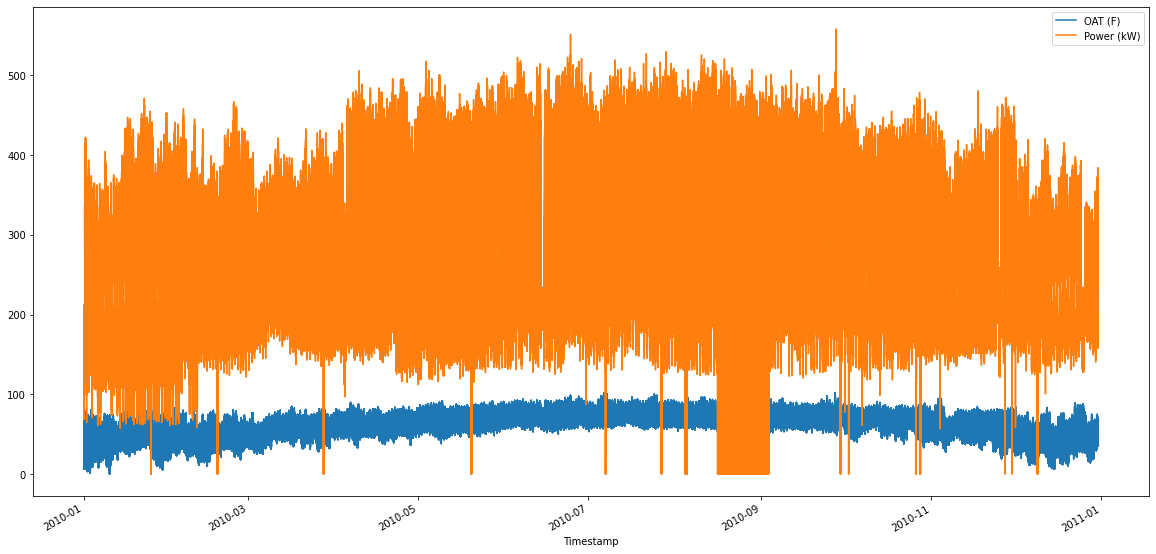

In [ ]:
DataTotal.plot(figsize=(20,10))

### Observación de un día en función de la temperatura y la portencia consumida

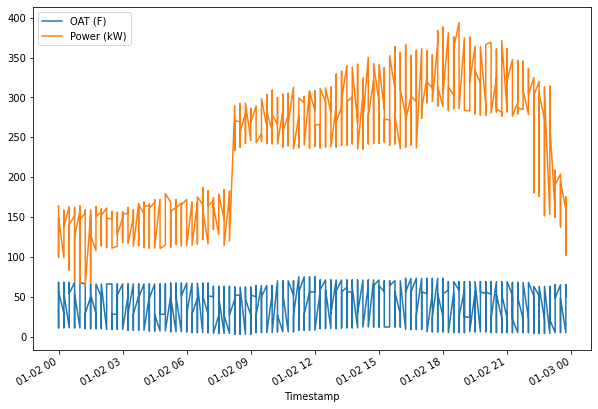

In [ ]:
DataTotal.loc['2010-01-02'].plot(figsize=(10,7))

### Temperatura y potencia en un mes especifico

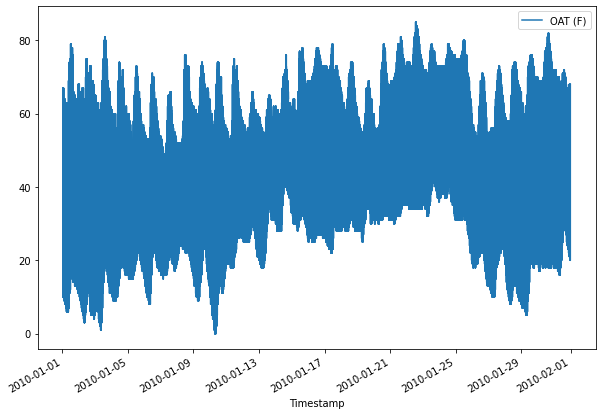

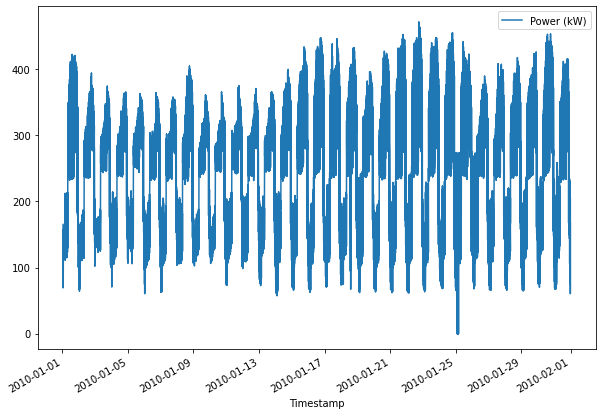

In [ ]:
DataTotal.loc['2010-01',['OAT (F)']].plot(figsize=(10,7))
DataTotal.loc['2010-01',['Power (kW)']].plot(figsize=(10,7))

### Histograma para la temperatura y la potencia

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6962858d0>,
      dtype=object)

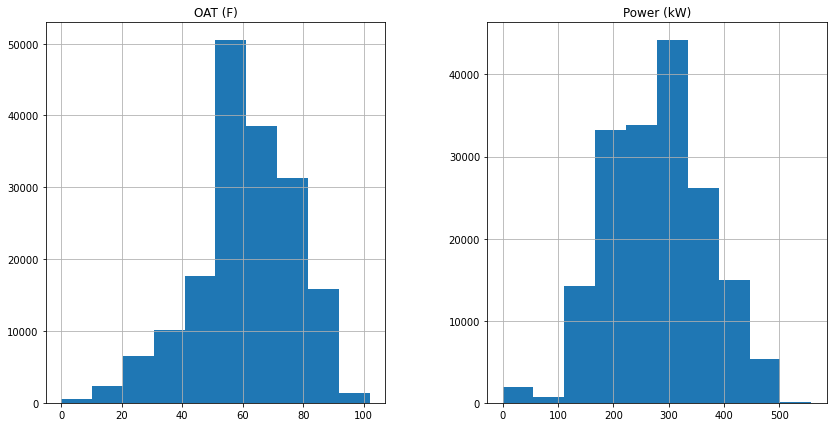

In [ ]:
DataTotal.hist(figsize=(14,7))

### Diagrama de cajas y bigotes

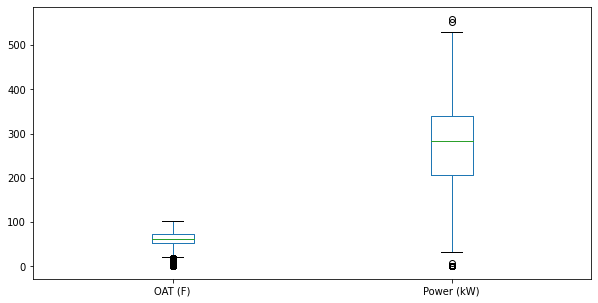

In [ ]:
DataTotal.plot(kind='box', figsize=(10,5))

### Graficas Temperatura Vs Potencia

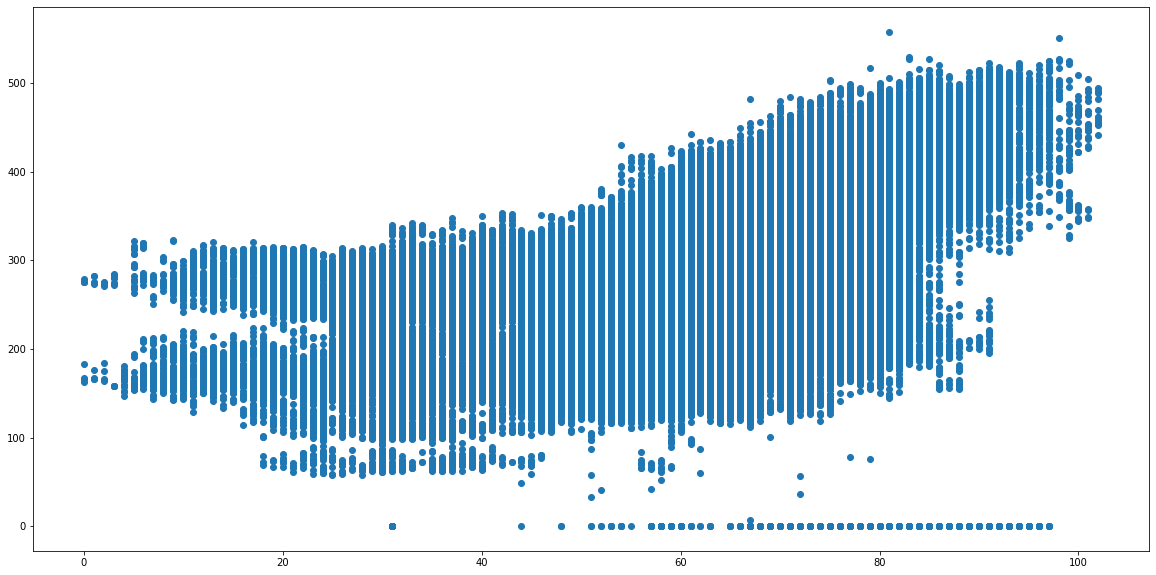

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(DataTotal['OAT (F)'],DataTotal['Power (kW)'])
plt.show()

### Limpieza de datos a partir de la regla de las $3\sigma$

In [ ]:
std_dev=3
outliers=(np.abs(stats.zscore(DataTotal))>3).any(axis=1)
DataTotal_outliers=DataTotal[outliers]

### DataFrame datos cuya desviación estandar es $> 3\sigma$ 

In [ ]:
DataTotal_outliers

,OAT (F),Power (kW)
Timestamp,,
2010-02-18 00:00:00,55,0.0
2010-02-18 00:15:00,54,0.0
2010-02-18 00:30:00,54,0.0
2010-02-18 00:45:00,54,0.0
2010-02-18 01:00:00,54,0.0
...,...,...
2010-12-20 05:15:00,12,175.6
2010-12-20 05:30:00,12,169.4
2010-12-20 05:45:00,12,176.2


### Grafica datos outliers

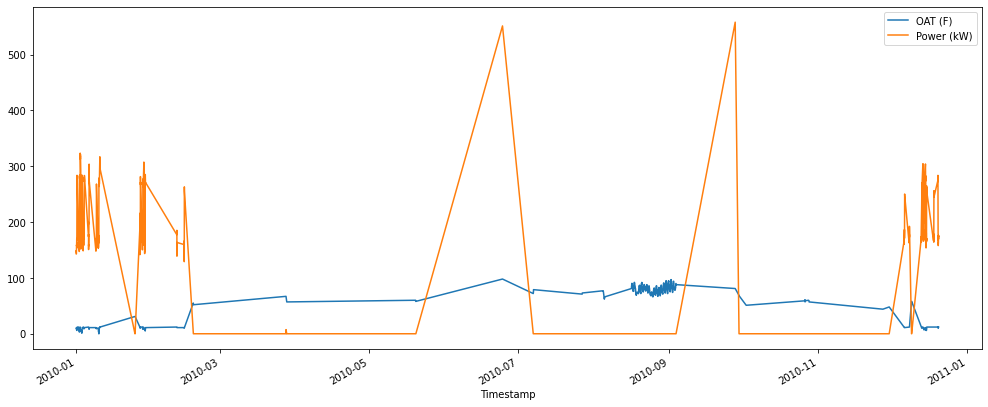

In [ ]:
DataTotal_outliers.plot(figsize=(17,7))

### Grafica datos limpios (libre de outliers)

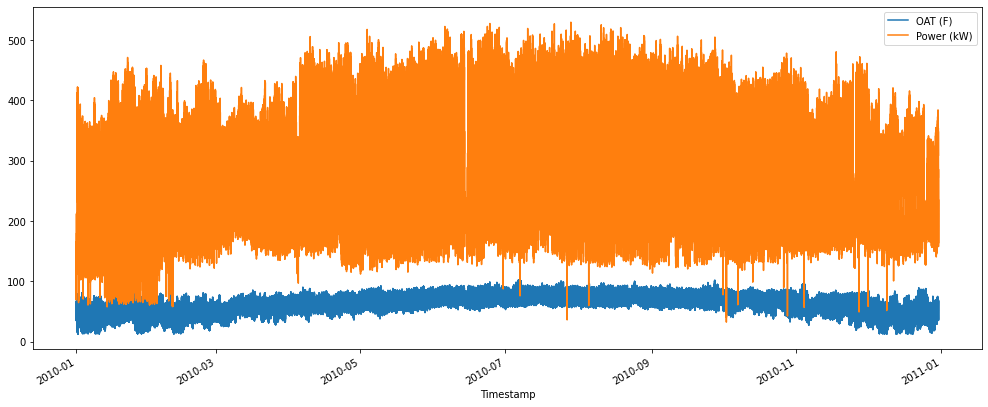

In [ ]:
DataTotal_clean=DataTotal[~outliers]
DataTotal_clean.plot(figsize=(17,7))

In [ ]:
DataTotal_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172034 entries, 2010-01-01 01:15:00 to 2010-12-31 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OAT (F)     172034 non-null  int64  
 1   Power (kW)  172034 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [ ]:
DataTotal_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2666 entries, 2010-02-18 00:00:00 to 2010-09-27 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OAT (F)     2666 non-null   int64  
 1   Power (kW)  2666 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.5 KB


### Grafica datos outliers y datos limpios

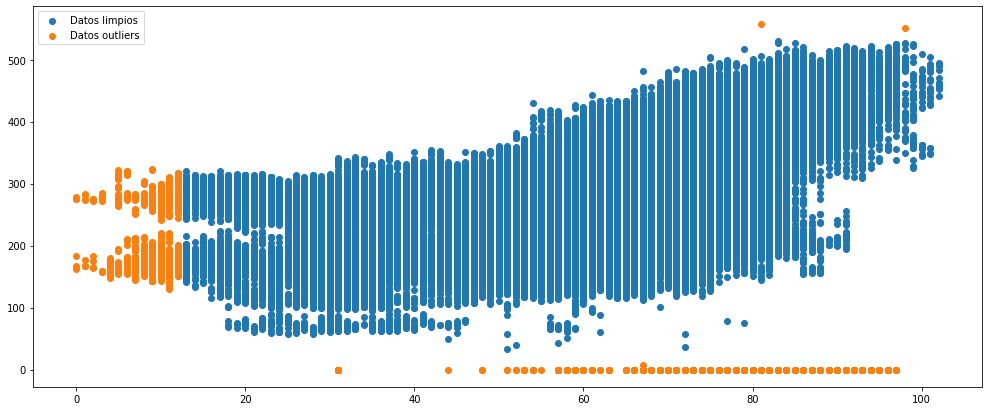

In [ ]:
plt.figure(figsize=(17,7))
plt.scatter(DataTotal_clean['OAT (F)'],DataTotal_clean['Power (kW)'],label="Datos limpios")
plt.scatter(DataTotal_outliers['OAT (F)'],DataTotal_outliers['Power (kW)'],label="Datos outliers")
plt.legend()

### Diagrama de cajas y bigotes para datos limpios

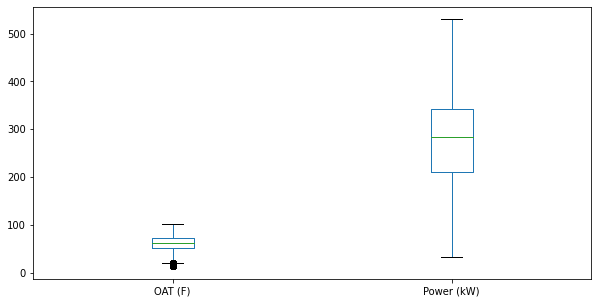

In [ ]:
DataTotal_clean.plot(kind='box', figsize=(10,5))

# Regresión Lineal para datos limpios usando la regla de las $3\sigma$

In [ ]:
X_clean=pd.DataFrame(DataTotal_clean['OAT (F)'])
Y_clean=pd.DataFrame(DataTotal_clean['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent=',linear_regression.coef_[0][0])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.34501886721900854
Coefficent= 3.118220552665843
Intercept= 92.7638455755781


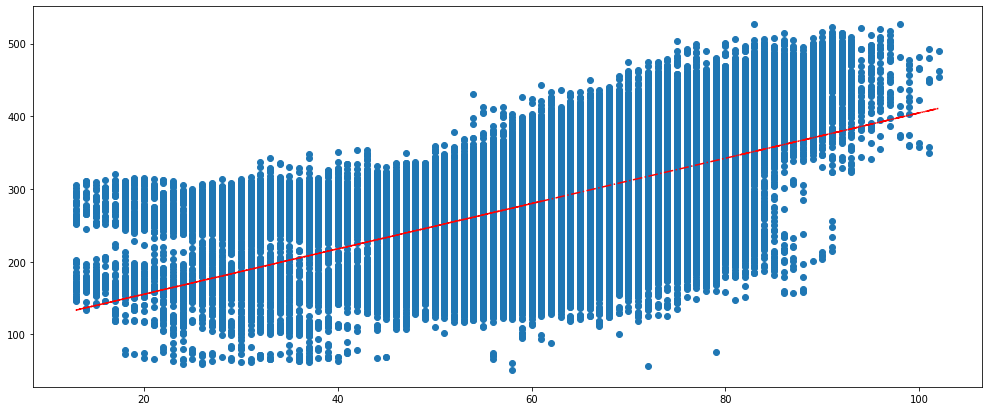

In [ ]:
plt.figure(figsize=(17,7))
Y_pred=linear_regression.intercept_[0]+linear_regression.coef_[0][0]*X_test.values.flatten()
# dibujar los datos
plt.plot(X_test.values.flatten(),y_test.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test.values.flatten(), Y_pred,'-.r')

## Metodo alternativo para limpeza de datos (Metodo IQR)

In [ ]:
# Cálculo del primer cuartil para la temperatura y la potencia
Tcuantil1=DataTotal["OAT (F)"].quantile(0.25) 
Pcuantil1=DataTotal["Power (kW)"].quantile(0.25) 

#Cálculo de la mediana para la temperatura y la potencia
Tcuantil2=DataTotal.median()[0] 
Pcuantil2=DataTotal.median()[1] 

#Cálculo del tercer cuartil para la temperatura y la potencia
Tcuantil3=DataTotal["OAT (F)"].quantile(0.75) 
Pcuantil3=DataTotal["Power (kW)"].quantile(0.75) 

#Cálculo del rango intercuartil para la temperatura y la potencia
TinterCuartil=Tcuantil3-Tcuantil1 
PinterCuartil=Pcuantil3-Pcuantil1 

#Limites superior e infrior para la potencia en base a la difencia y suma del uarti uno y tres y el rango intercuartil para la temperatura
TlimInf= Tcuantil1-1.5*TinterCuartil 
TlimSup= Tcuantil3+1.5*TinterCuartil 

#Valor minimo y máximo de la temperatura
MinT= DataTotal["OAT (F)"].min() 
MaxT= DataTotal["OAT (F)"].max() 

#Limites superior e infrior para la potencia en base a la difencia y suma del uarti uno y tres y el rango intercuartil para la potencia
PlimInf= Pcuantil1-1.5*PinterCuartil 
PlimSup= Pcuantil3+1.5*PinterCuartil 

#Valor minimo y máximo de la potencia
MinP= DataTotal["Power (kW)"].min() 
MaxP=DataTotal["Power (kW)"].max() 

#Posición para el bigote inferior de la temperatura
if MinT <= TlimInf:
    TwhiskerInf=TlimInf 
else:
    TwhiskerInf=MinT 

#Posición para el bigote superior de la temperatura
if TlimSup <= MaxT:
    TwhiskerSup=TlimSup 
else:
    TwhiskerSup=MaxT

#Posición para el bigote inferior de la presión
if MinP <= PlimInf:
    PwhiskerInf=PlimInf 
else:
    PwhiskerInf=MinP

#Posición para el bigote superir de la presión    
if PlimSup <= MaxP:
    PwhiskerSup=PlimSup 
else:
    PwhiskerSup=MaxP

#Outliers para la temperatura
Toutliers=((DataTotal["OAT (F)"]<TwhiskerInf) | (DataTotal["OAT (F)"]>TwhiskerSup)).values
Toutliers.shape=(len(Toutliers),1)
Toutliers=pd.DataFrame(Toutliers)

#Outliers para la presión
Poutliers=((DataTotal["Power (kW)"]<PwhiskerInf) | (DataTotal["Power (kW)"]>PwhiskerSup)).values
Poutliers.shape=(len(Poutliers),1)
Poutliers=pd.DataFrame(Poutliers)

#Concatenación de los outliers de la temperatura y la presión
outliers2=pd.concat([Toutliers,Poutliers],axis=1).values

### Outliers obtenidos con el metodo IQR

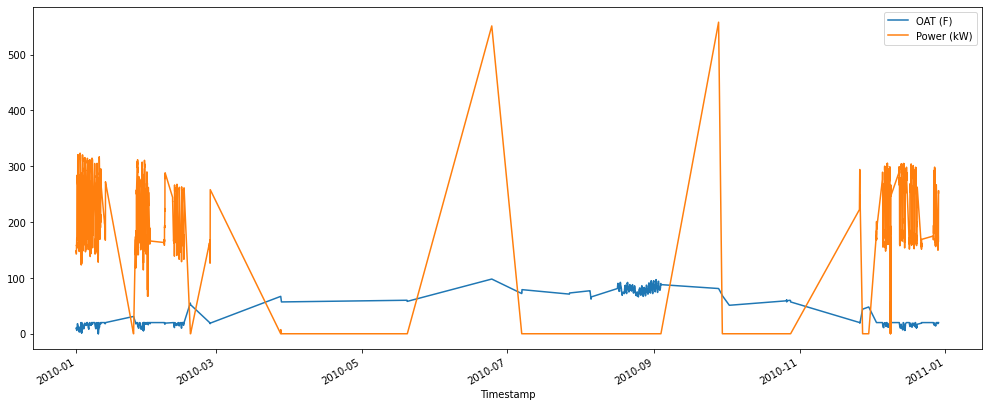

In [ ]:
outliers2=outliers2.any(axis=1)
DataTotal_outliers2=DataTotal[outliers2]
DataTotal_outliers2.plot(figsize=(17,7))

### Datos limpios con el metodo IQR

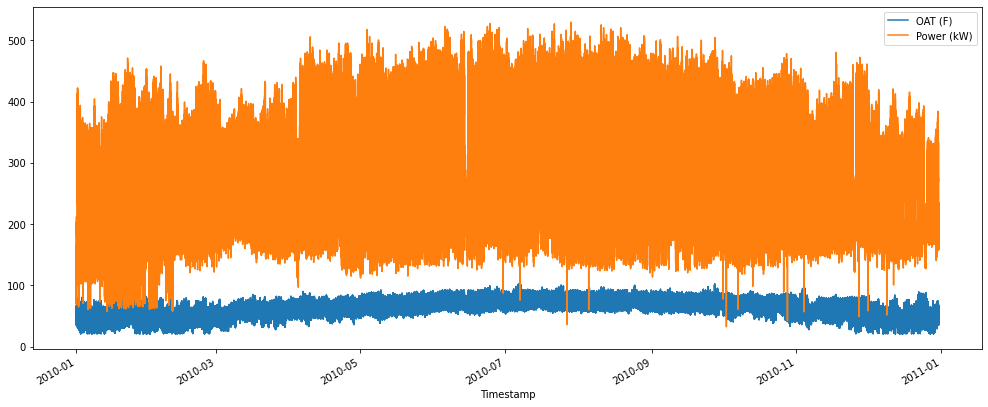

In [ ]:
DataTotal_clean2=DataTotal[~outliers2]
DataTotal_clean2.plot(figsize=(17,7))

In [ ]:
DataTotal_clean2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169914 entries, 2010-01-01 01:15:00 to 2010-12-31 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OAT (F)     169914 non-null  int64  
 1   Power (kW)  169914 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [ ]:
DataTotal_outliers2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2010-02-18 00:00:00 to 2010-09-27 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OAT (F)     4786 non-null   int64  
 1   Power (kW)  4786 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 112.2 KB


### Diagrama de cajas y lingotes para los datos limpios

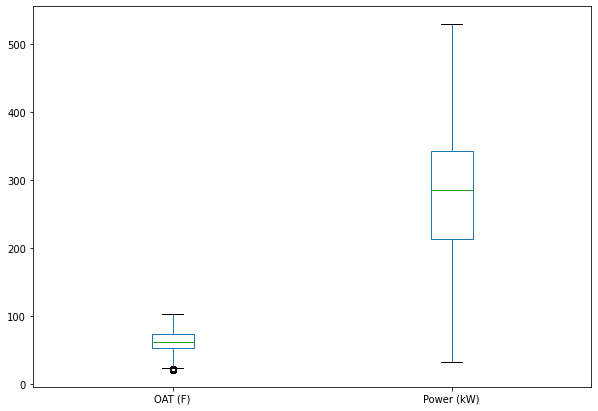

In [ ]:
DataTotal_clean2.plot(kind="box",figsize=(10,7))

### Grafica datos outliers y datos limpios

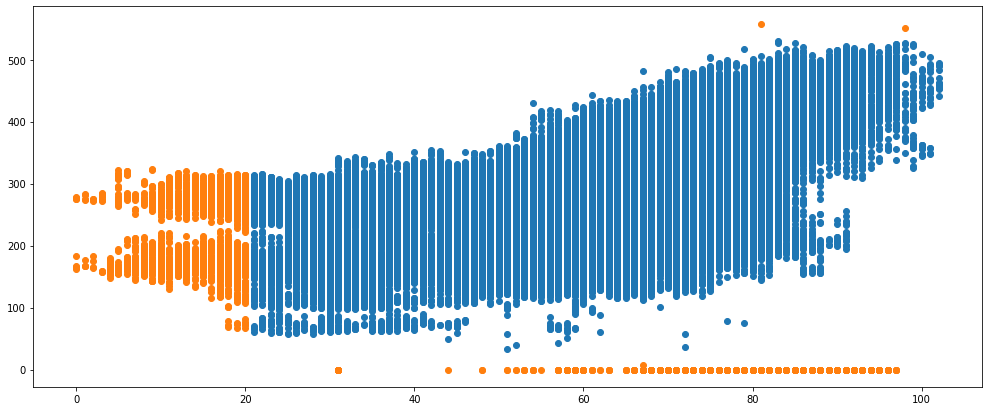

In [ ]:
plt.figure(figsize=(17,7))
plt.scatter(DataTotal_clean2['OAT (F)'],DataTotal_clean2['Power (kW)'])
plt.scatter(DataTotal_outliers2['OAT (F)'],DataTotal_outliers2['Power (kW)'])

## Observese como el número de outliers es mayor, comparado con los obtenidos por el metodo de los $3\sigma$

# Regresión Lineal para datos limpios con el metodo IQR

In [ ]:
X_clean2=pd.DataFrame(DataTotal_clean2['OAT (F)'])
Y_clean2=pd.DataFrame(DataTotal_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X_clean2, Y_clean2, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent=',linear_regression.coef_[0][0])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.35109431965276755
Coefficent= 3.3131401254955177
Intercept= 79.856319952511


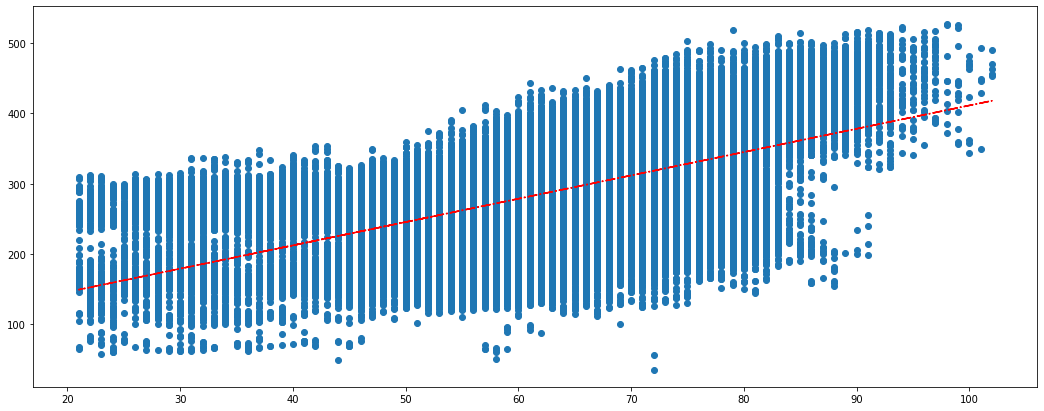

In [ ]:
plt.figure(figsize=(18,7))
Y_pred2=linear_regression.intercept_[0]+linear_regression.coef_[0][0]*X_test.values.flatten()
# dibujar los datos
plt.plot(X_test.values.flatten(),y_test.values.flatten(),'o')
# dibujar recta estimada
plt.plot(X_test.values.flatten(), Y_pred2,'-.r')

# DataFrame ampliado
### Se añaden las variables hora, mes, horario de funcionamiento y estación:
### El horario de funcionamiento se determinó como aquel que se encuentra entre las 9 y 21 horas (abierto valor 1 - cerrado valor 0).
### Las estaciones solo se consideraron como dos, el primero de ellos recoge los meses de Marzo a Agosto (valor 0) y la segunda estación desde Septiembre hasta Febrero (valor 1), esto en base al comportamineto de la potencia en estos periodos.

In [ ]:
DataTotal_clean2copy=DataTotal_clean2.copy()
DataTotal_clean2copy['hour']=DataTotal_clean2.index.hour
DataTotal_clean2copy['month']=DataTotal_clean2.index.month
DataTotal_clean2copy['open_hours'] = np.where((DataTotal_clean2copy.index.hour >= 9) & (DataTotal_clean2copy.index.hour <= 21),1,0)
DataTotal_clean2copy['stations']=np.where((DataTotal_clean2copy.index.month >=3) & (DataTotal_clean2copy.index.month <=8),0,1)
DataTotal_clean2copy=DataTotal_clean2copy.drop(['mouth'],axis=1)

In [ ]:
DataTotal_clean2copy

,OAT (F),Power (kW),hour,month,open_hours,stations
Timestamp,,,,,,
2010-01-01 01:15:00,51,165.1,1,1,0,1
2010-01-01 01:30:00,51,151.6,1,1,0,1
2010-01-01 01:45:00,51,146.9,1,1,0,1
2010-01-01 02:00:00,51,153.7,2,1,0,1
2010-01-01 02:15:00,51,153.8,2,1,0,1
...,...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,12,0,1
2010-12-30 23:15:00,68,221.0,23,12,0,1
2010-12-30 23:30:00,68,235.7,23,12,0,1


# Regresión Lineal con las variables añadidas seleccionadas por grupos

## Temperatura y horario de funcionamiento

In [ ]:
X = pd.DataFrame(DataTotal_clean2copy[['OAT (F)','month']])
y = pd.DataFrame(DataTotal_clean2copy['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent Temperature=',linear_regression.coef_[0][0])
print('Coefficent Month=',linear_regression.coef_[0][1])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.35154757002116654
Coefficent Temperature= 3.3319219678019234
Coefficent Month= -0.5254543727669445
Intercept= 82.1238157120815


### Grafica 3d datos de entrenamiento

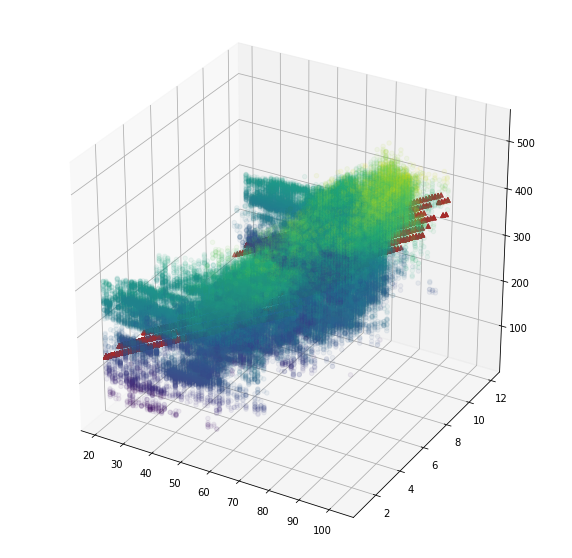

In [ ]:
fig = plt.figure(figsize=(10,10))
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_train['OAT (F)'].values.flatten() + linear_regression.coef_[0][1] * X_train['month'].values.flatten()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['OAT (F)'], X_train['month'], y_pred, c="brown",marker="^")
ax.scatter(X_train['OAT (F)'], X_train['month'], y_train, c=y_train, cmap='viridis',alpha=0.07)

### Grafica 3d datos de testeo

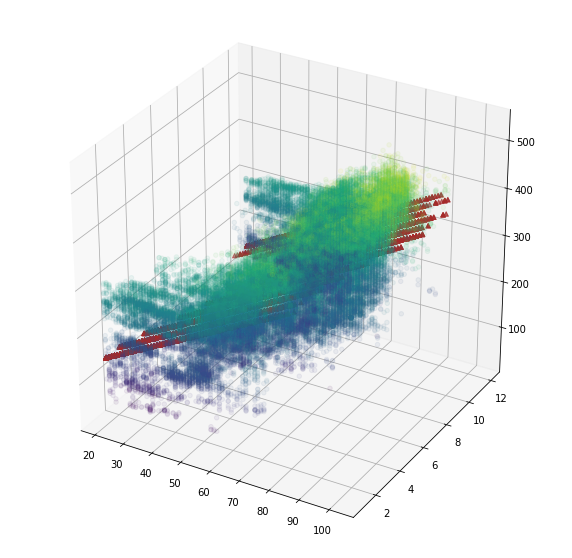

In [ ]:
fig = plt.figure(figsize=(10,10))
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test['OAT (F)'].values.flatten() + linear_regression.coef_[0][1] * X_test['month'].values.flatten()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['OAT (F)'], X_test['month'], y_pred, c="brown",marker="^")
ax.scatter(X_test['OAT (F)'], X_test['month'], y_test, c=y_test, cmap='viridis',alpha=0.07)

### Temperatura, horario de funcionamiento y hora

In [ ]:
X = pd.DataFrame(DataTotal_clean2copy[['OAT (F)','open_hours', 'hour']])
y = pd.DataFrame(DataTotal_clean2copy['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent Temperature=',linear_regression.coef_[0][0])
print('Coefficent Open Hours=',linear_regression.coef_[0][1])
print('Coefficent Hour=',linear_regression.coef_[0][2])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.6980324834715188
Coefficent Temperature= 2.6080378035018357
Coefficent Open Hours= 68.35176137114702
Coefficent Hour= 3.485749992226715
Intercept= 45.86442530167639


### Temperatura, horario de funcionamiento y mes

In [ ]:
X = pd.DataFrame(DataTotal_clean2copy[['OAT (F)','open_hours', 'month']])
y = pd.DataFrame(DataTotal_clean2copy['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent Temperature=',linear_regression.coef_[0][0])
print('Coefficent Open Hours=',linear_regression.coef_[0][1])
print('Coefficent Month=',linear_regression.coef_[0][2])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.6436190845205726
Coefficent Temperature= 2.6573052179191223
Coefficent Open Hours= 94.6232948783587
Coefficent Month= -0.0241735140300392
Intercept= 68.88212669186805


### Temperatura, hora de funcionamiento, hora y mes

In [ ]:
X = pd.DataFrame(DataTotal_clean2copy[['OAT (F)','open_hours', 'hour','month']])
y = pd.DataFrame(DataTotal_clean2copy['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Score=',linear_regression.score(X_test,y_test))
print('Coefficent Temperature=',linear_regression.coef_[0][0])
print('Coefficent Open Hours=',linear_regression.coef_[0][1])
print('Coefficent Hour=',linear_regression.coef_[0][2])
print('Coefficent Month=',linear_regression.coef_[0][3])
print('Intercept=',linear_regression.intercept_[0])

Score= 0.6980405750894499
Coefficent Temperature= 2.606975146375633
Coefficent Open Hours= 68.35845753734455
Coefficent Hour= 3.485892932014444
Coefficent Month= 0.028059580027040454
Intercept= 45.741764677666396


## De acuerdo a los resultados obtenidos, el modelo que mejor resultados mostró (según un score de 0.69804) fue en el que se incluye la temperatura, el horario de funcionamiento, la hora y el mes. En comparación con el primer entrenamiento (el cual obtuvo un score de 0.3510) la diferencia porcentual es de 50.3% 